In [1]:
import numpy as np
import matplotlib.cm as cm
from matplotlib import ticker
import math
import scipy
from scipy import spatial
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as mtick
import xarray as xr
import dask
from sklearn.neighbors import KDTree
import netCDF4
from metpy import calc
from metpy.units import units

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from IPython.display import HTML
from matplotlib import animation
from matplotlib.gridspec import GridSpec
from scipy.stats import gaussian_kde
import skimage
import plotly.graph_objects as go

from matplotlib import animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.cluster import KMeans

import matplotlib
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib import ticker
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from statistics import mode
from matplotlib import transforms
import netCDF4

import os

/export/nfs0home/hmangipu/miniconda3/envs/GPU/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'stix'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

In [3]:
Zero_K_P_001_profile_3 = np.load("../compressed_data/Precip_3312_0K_ww_mean_profile_001_3.npy")
Zero_K_P_01_profile_3 = np.load("../compressed_data/Precip_3312_0K_ww_mean_profile_01_3.npy")
Zero_K_P_1_profile_3 = np.load("../compressed_data/Precip_3312_0K_ww_mean_profile_1_3.npy")
Zero_K_P_5_profile_3 = np.load("../compressed_data/Precip_3312_0K_ww_mean_profile_5_3.npy")
Zero_K_P_25_profile_3 = np.load("../compressed_data/Precip_3312_0K_ww_mean_profile_25_3.npy")
Zero_K_P_75_profile_3 = np.load("../compressed_data/Precip_3312_0K_ww_mean_profile_75_3.npy")
Zero_K_P_95_profile_3 = np.load("../compressed_data/Precip_3312_0K_ww_mean_profile_95_3.npy")
Zero_K_P_99_profile_3 = np.load("../compressed_data/Precip_3312_0K_ww_mean_profile_99_3.npy")
Zero_K_P_999_profile_3 = np.load("../compressed_data/Precip_3312_0K_ww_mean_profile_999_3.npy")
Zero_K_P_9999_profile_3 = np.load("../compressed_data/Precip_3312_0K_ww_mean_profile_9999_3.npy")
Zero_K_P_50_profile_3 = np.load("../compressed_data/Precip_3312_0K_ww_mean_profile_50_3.npy")

Zero_K_P_001_profile_2 = np.load("../compressed_data/Precip_3312_0K_ww_mean_profile_001_2.npy")
Zero_K_P_01_profile_2 = np.load("../compressed_data/Precip_3312_0K_ww_mean_profile_01_2.npy")
Zero_K_P_1_profile_2 = np.load("../compressed_data/Precip_3312_0K_ww_mean_profile_1_2.npy")
Zero_K_P_5_profile_2 = np.load("../compressed_data/Precip_3312_0K_ww_mean_profile_5_2.npy")
Zero_K_P_25_profile_2 = np.load("../compressed_data/Precip_3312_0K_ww_mean_profile_25_2.npy")
Zero_K_P_75_profile_2 = np.load("../compressed_data/Precip_3312_0K_ww_mean_profile_75_2.npy")
Zero_K_P_95_profile_2 = np.load("../compressed_data/Precip_3312_0K_ww_mean_profile_95_2.npy")
Zero_K_P_99_profile_2 = np.load("../compressed_data/Precip_3312_0K_ww_mean_profile_99_2.npy")
Zero_K_P_999_profile_2 = np.load("../compressed_data/Precip_3312_0K_ww_mean_profile_999_2.npy")
Zero_K_P_9999_profile_2 = np.load("../compressed_data/Precip_3312_0K_ww_mean_profile_9999_2.npy")
Zero_K_P_50_profile_2 = np.load("../compressed_data/Precip_3312_0K_ww_mean_profile_50_2.npy")

Zero_K_P_001_profile_1 = np.load("../compressed_data/3312_0K_ww_mean_profile_001_1.npy")
Zero_K_P_01_profile_1 = np.load("../compressed_data/3312_0K_ww_mean_profile_01_1.npy")
Zero_K_P_1_profile_1 = np.load("../compressed_data/3312_0K_ww_mean_profile_1_1.npy")
Zero_K_P_5_profile_1 = np.load("../compressed_data/3312_0K_ww_mean_profile_5_1.npy")
Zero_K_P_25_profile_1 = np.load("../compressed_data/3312_0K_ww_mean_profile_25_1.npy")
Zero_K_P_75_profile_1 = np.load("../compressed_data/3312_0K_ww_mean_profile_75_1.npy")
Zero_K_P_95_profile_1 = np.load("../compressed_data/3312_0K_ww_mean_profile_95_1.npy")
Zero_K_P_99_profile_1 = np.load("../compressed_data/3312_0K_ww_mean_profile_99_1.npy")
Zero_K_P_999_profile_1 = np.load("../compressed_data/3312_0K_ww_mean_profile_999_1.npy")
Zero_K_P_9999_profile_1 = np.load("../compressed_data/3312_0K_ww_mean_profile_9999_1.npy")
Zero_K_P_50_profile_1 = np.load("../compressed_data/3312_0K_ww_mean_profile_50_1.npy")

Four_K_P_001_profile_3 = np.load("../compressed_data/3312_4K_ww_mean_profile_001_3.npy")
Four_K_P_01_profile_3 = np.load("../compressed_data/3312_4K_ww_mean_profile_01_3.npy")
Four_K_P_1_profile_3 = np.load("../compressed_data/3312_4K_ww_mean_profile_1_3.npy")
Four_K_P_5_profile_3 = np.load("../compressed_data/3312_4K_ww_mean_profile_5_3.npy")
Four_K_P_25_profile_3 = np.load("../compressed_data/3312_4K_ww_mean_profile_25_3.npy")
Four_K_P_75_profile_3 = np.load("../compressed_data/3312_4K_ww_mean_profile_75_3.npy")
Four_K_P_95_profile_3 = np.load("../compressed_data/3312_4K_ww_mean_profile_95_3.npy")
Four_K_P_99_profile_3 = np.load("../compressed_data/3312_4K_ww_mean_profile_99_3.npy")
Four_K_P_999_profile_3 = np.load("../compressed_data/3312_4K_ww_mean_profile_999_3.npy")
Four_K_P_9999_profile_3 = np.load("../compressed_data/3312_4K_ww_mean_profile_9999_3.npy")
Four_K_P_50_profile_3 = np.load("../compressed_data/3312_4K_ww_mean_profile_50_3.npy")

Four_K_P_001_profile_2 = np.load("../compressed_data/3312_4K_ww_mean_profile_001_2.npy")
Four_K_P_01_profile_2 = np.load("../compressed_data/3312_4K_ww_mean_profile_01_2.npy")
Four_K_P_1_profile_2 = np.load("../compressed_data/3312_4K_ww_mean_profile_1_2.npy")
Four_K_P_5_profile_2 = np.load("../compressed_data/3312_4K_ww_mean_profile_5_2.npy")
Four_K_P_25_profile_2 = np.load("../compressed_data/3312_4K_ww_mean_profile_25_2.npy")
Four_K_P_75_profile_2 = np.load("../compressed_data/3312_4K_ww_mean_profile_75_2.npy")
Four_K_P_95_profile_2 = np.load("../compressed_data/3312_4K_ww_mean_profile_95_2.npy")
Four_K_P_99_profile_2 = np.load("../compressed_data/3312_4K_ww_mean_profile_99_2.npy")
Four_K_P_999_profile_2 = np.load("../compressed_data/3312_4K_ww_mean_profile_999_2.npy")
Four_K_P_9999_profile_2 = np.load("../compressed_data/3312_4K_ww_mean_profile_9999_2.npy")
Four_K_P_50_profile_2 = np.load("../compressed_data/3312_4K_ww_mean_profile_50_2.npy")

Four_K_P_001_profile_1 = np.load("../compressed_data/3312_4K_ww_mean_profile_001_1.npy")
Four_K_P_01_profile_1 = np.load("../compressed_data/3312_4K_ww_mean_profile_01_1.npy")
Four_K_P_1_profile_1 = np.load("../compressed_data/3312_4K_ww_mean_profile_1_1.npy")
Four_K_P_5_profile_1 = np.load("../compressed_data/3312_4K_ww_mean_profile_5_1.npy")
Four_K_P_25_profile_1 = np.load("../compressed_data/3312_4K_ww_mean_profile_25_1.npy")
Four_K_P_75_profile_1 = np.load("../compressed_data/3312_4K_ww_mean_profile_75_1.npy")
Four_K_P_95_profile_1 = np.load("../compressed_data/3312_4K_ww_mean_profile_95_1.npy")
Four_K_P_99_profile_1 = np.load("../compressed_data/3312_4K_ww_mean_profile_99_1.npy")
Four_K_P_999_profile_1 = np.load("../compressed_data/3312_4K_ww_mean_profile_999_1.npy")
Four_K_P_9999_profile_1 = np.load("../compressed_data/3312_4K_ww_mean_profile_9999_1.npy")
Four_K_P_50_profile_1 = np.load("../compressed_data/3312_4K_ww_mean_profile_50_1.npy")

In [4]:
path = '../compressed_data/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-00000.nc'
extra_variables = xr.open_dataset(path)
ha = extra_variables.hyam.values
hb = extra_variables.hybm.values
SPCAM_P = extra_variables.lev.values

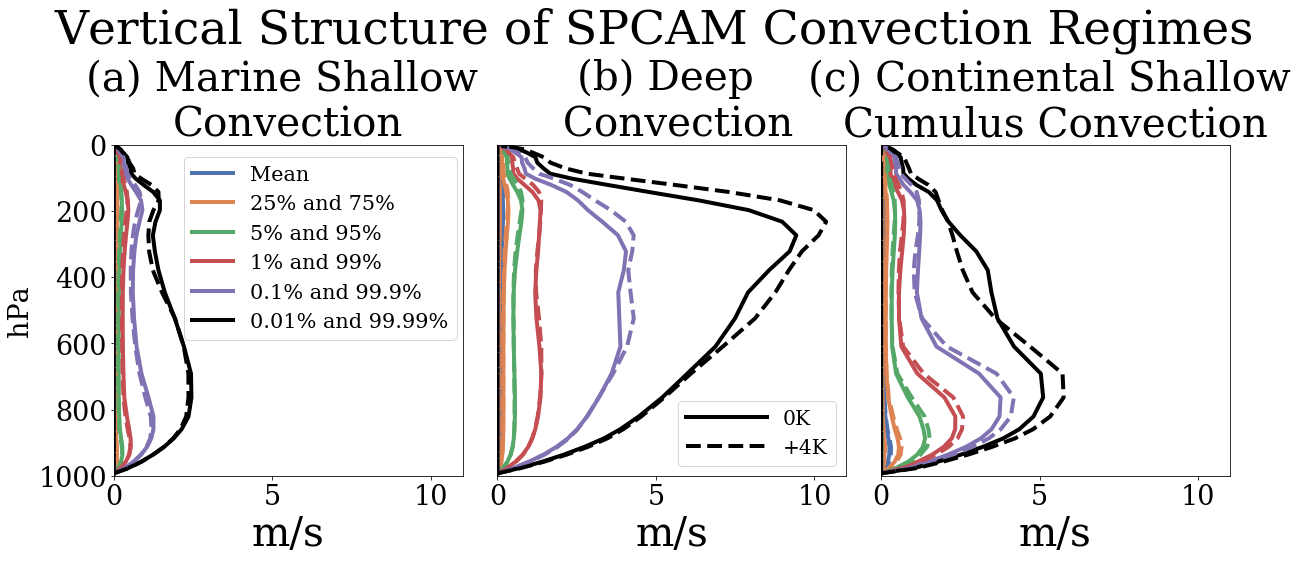

In [82]:
import seaborn as sns

fig, ax = plt.subplots(1,3, figsize=(20,8))

colors = sns.color_palette("deep", 6)

ax[0].plot(Zero_K_P_50_profile_3, np.flipud(SPCAM_P), color=colors[0], label="Mean")
ax[0].plot(Four_K_P_50_profile_3, np.flipud(SPCAM_P), color=colors[0])
ax[0].plot(Zero_K_P_25_profile_3, np.flipud(SPCAM_P), color=colors[1], label="25% and 75%")
ax[0].plot(Zero_K_P_75_profile_3, np.flipud(SPCAM_P), color=colors[1])
ax[0].plot(Zero_K_P_5_profile_3, np.flipud(SPCAM_P), color=colors[2], label="5% and 95%")
ax[0].plot(Zero_K_P_95_profile_3, np.flipud(SPCAM_P), color=colors[2])
ax[0].plot(Zero_K_P_1_profile_3, np.flipud(SPCAM_P), color=colors[3], label="1% and 99%")
ax[0].plot(Zero_K_P_99_profile_3, np.flipud(SPCAM_P), color=colors[3])
ax[0].plot(Zero_K_P_01_profile_3, np.flipud(SPCAM_P), color=colors[4], label="0.1% and 99.9%")
ax[0].plot(Zero_K_P_999_profile_3, np.flipud(SPCAM_P), color=colors[4])
ax[0].plot(Zero_K_P_001_profile_3, np.flipud(SPCAM_P), color="black", label="0.01% and 99.99%")
ax[0].plot(Zero_K_P_9999_profile_3, np.flipud(SPCAM_P), color="black")

ax[0].plot(Four_K_P_25_profile_3, np.flipud(SPCAM_P), color=colors[1], linestyle="dashed")
ax[0].plot(Four_K_P_75_profile_3, np.flipud(SPCAM_P), color=colors[1], linestyle="dashed")
ax[0].plot(Four_K_P_5_profile_3, np.flipud(SPCAM_P), color=colors[2], linestyle="dashed")
ax[0].plot(Four_K_P_95_profile_3, np.flipud(SPCAM_P), color=colors[2], linestyle="dashed")
ax[0].plot(Four_K_P_1_profile_3, np.flipud(SPCAM_P), color=colors[3], linestyle="dashed")
ax[0].plot(Four_K_P_99_profile_3, np.flipud(SPCAM_P), color=colors[3], linestyle="dashed")
ax[0].plot(Four_K_P_01_profile_3, np.flipud(SPCAM_P), color=colors[4], linestyle="dashed")
ax[0].plot(Four_K_P_999_profile_3, np.flipud(SPCAM_P), color=colors[4], linestyle="dashed")
ax[0].plot(Four_K_P_001_profile_3, np.flipud(SPCAM_P), color="black", linestyle="dashed")
ax[0].plot(Four_K_P_9999_profile_3, np.flipud(SPCAM_P), color="black", linestyle="dashed")
   
ax[0].set_ylim(ax[0].get_ylim()[::-1])
ax[0].set_ylim(1000,0)
ax[0].set_title("(a) Marine Shallow \nConvection",  fontsize=fz*1.5)
ax[0].legend(fontsize=fz*0.77,  bbox_to_anchor=(0.17, 0.38))
# ax[0].set_xticks([])
ax[0].set_ylabel("hPa", fontsize=fz)
ax[0].set_xlim(0,11)
ax[0].tick_params(axis="y", labelsize=fz)
ax[0].set_xlabel("m/s", fontsize=fz*1.5)
ax[0].tick_params(axis="x", labelsize=fz)



ax[1].plot(Zero_K_P_50_profile_2, np.flipud(SPCAM_P), color=colors[0])
ax[1].plot(Four_K_P_50_profile_2, np.flipud(SPCAM_P), color=colors[0], linestyle = "dashed")

ax[1].plot(Zero_K_P_25_profile_2, np.flipud(SPCAM_P), color=colors[1])
ax[1].plot(Zero_K_P_75_profile_2, np.flipud(SPCAM_P), color=colors[1])
ax[1].plot(Zero_K_P_5_profile_2, np.flipud(SPCAM_P), color=colors[2])
ax[1].plot(Zero_K_P_95_profile_2, np.flipud(SPCAM_P), color=colors[2])
ax[1].plot(Zero_K_P_1_profile_2, np.flipud(SPCAM_P), color=colors[3])
ax[1].plot(Zero_K_P_99_profile_2, np.flipud(SPCAM_P), color=colors[3])
ax[1].plot(Zero_K_P_01_profile_2, np.flipud(SPCAM_P), color=colors[4])
ax[1].plot(Zero_K_P_999_profile_2, np.flipud(SPCAM_P), color=colors[4])
ax[1].plot(Zero_K_P_001_profile_2, np.flipud(SPCAM_P), color="black", label="0K")
ax[1].plot(Zero_K_P_9999_profile_2, np.flipud(SPCAM_P), color="black")

ax[1].plot(Four_K_P_25_profile_2, np.flipud(SPCAM_P), color=colors[1], linestyle="dashed")
ax[1].plot(Four_K_P_75_profile_2, np.flipud(SPCAM_P), color=colors[1], linestyle="dashed")
ax[1].plot(Four_K_P_5_profile_2, np.flipud(SPCAM_P), color=colors[2], linestyle="dashed")
ax[1].plot(Four_K_P_95_profile_2, np.flipud(SPCAM_P), color=colors[2], linestyle="dashed")
ax[1].plot(Four_K_P_1_profile_2, np.flipud(SPCAM_P), color=colors[3], linestyle="dashed")
ax[1].plot(Four_K_P_99_profile_2, np.flipud(SPCAM_P), color=colors[3], linestyle="dashed")
ax[1].plot(Four_K_P_01_profile_2, np.flipud(SPCAM_P), color=colors[4], linestyle="dashed")
ax[1].plot(Four_K_P_999_profile_2, np.flipud(SPCAM_P), color=colors[4], linestyle="dashed")
ax[1].plot(Four_K_P_001_profile_2, np.flipud(SPCAM_P), color="black", linestyle="dashed")
ax[1].plot(Four_K_P_9999_profile_2, np.flipud(SPCAM_P), color="black", linestyle="dashed", label="+4K")
   
ax[1].set_ylim(ax[1].get_ylim()[::-1])
ax[1].set_ylim(1000,0)
ax[1].set_title("(b) Deep \n Convection",  fontsize=fz*1.5)
ax[1].legend(fontsize=fz*.75, handlelength=4)

ax[1].set_xlabel("m/s", fontsize=fz*1.5)
ax[1].set_yticks([])
ax[1].set_xlim(0,11)
ax[1].tick_params(axis="x", labelsize=fz)

ax[2].plot(Zero_K_P_50_profile_1, np.flipud(SPCAM_P), color=colors[0])
ax[2].plot(Four_K_P_50_profile_1, np.flipud(SPCAM_P), color=colors[0], linestyle="dashed")
ax[2].plot(Zero_K_P_25_profile_1, np.flipud(SPCAM_P), color=colors[1])
ax[2].plot(Zero_K_P_75_profile_1, np.flipud(SPCAM_P), color=colors[1])
ax[2].plot(Zero_K_P_5_profile_1, np.flipud(SPCAM_P), color=colors[2])
ax[2].plot(Zero_K_P_95_profile_1, np.flipud(SPCAM_P), color=colors[2])
ax[2].plot(Zero_K_P_1_profile_1, np.flipud(SPCAM_P), color=colors[3])
ax[2].plot(Zero_K_P_99_profile_1, np.flipud(SPCAM_P), color=colors[3])
ax[2].plot(Zero_K_P_01_profile_1, np.flipud(SPCAM_P), color=colors[4])
ax[2].plot(Zero_K_P_999_profile_1, np.flipud(SPCAM_P), color=colors[4])
ax[2].plot(Zero_K_P_001_profile_1, np.flipud(SPCAM_P), color="black")
ax[2].plot(Zero_K_P_9999_profile_1, np.flipud(SPCAM_P), color="black")

ax[2].plot(Four_K_P_25_profile_1, np.flipud(SPCAM_P), color=colors[1], linestyle="dashed")
ax[2].plot(Four_K_P_75_profile_1, np.flipud(SPCAM_P), color=colors[1], linestyle="dashed")
ax[2].plot(Four_K_P_5_profile_1, np.flipud(SPCAM_P), color=colors[2], linestyle="dashed")
ax[2].plot(Four_K_P_95_profile_1, np.flipud(SPCAM_P), color=colors[2], linestyle="dashed")
ax[2].plot(Four_K_P_1_profile_1, np.flipud(SPCAM_P), color=colors[3], linestyle="dashed")
ax[2].plot(Four_K_P_99_profile_1, np.flipud(SPCAM_P), color=colors[3], linestyle="dashed")
ax[2].plot(Four_K_P_01_profile_1, np.flipud(SPCAM_P), color=colors[4], linestyle="dashed")
ax[2].plot(Four_K_P_999_profile_1, np.flipud(SPCAM_P), color=colors[4], linestyle="dashed")
ax[2].plot(Four_K_P_001_profile_1, np.flipud(SPCAM_P), color="black", linestyle="dashed")
ax[2].plot(Four_K_P_9999_profile_1, np.flipud(SPCAM_P), color="black", linestyle="dashed")
   
ax[2].set_ylim(ax[1].get_ylim()[::-1])
ax[2].set_ylim(1000,0)
ax[2].set_title("(c) Continental Shallow \nCumulus Convection",  fontsize=fz*1.5)
ax[2].set_xlabel("m/s", fontsize=fz*1.5)
# ax[2].set_ylabel("hPa",  fontsize=fz)
ax[2].set_xlim(0,11)
ax[2].set_yticks([])
# ax[2].tick_params(axis="y", labelsize=fz)
ax[2].tick_params(axis="x", labelsize=fz)
# fig.delaxes(ax[1,1])


plt.suptitle("Vertical Structure of SPCAM Convection Regimes", y=0.94, fontsize = fz*1.75)
plt.subplots_adjust(hspace=0.12, wspace=0.1)
plt.subplots_adjust(top =0.7)

plt.savefig("../Figures/Figure_S11.png", bbox_inches='tight',pad_inches = 0)
plt.savefig("../Figures/Figure_S11.pdf", bbox_inches='tight',pad_inches = 0)